In [24]:
import numpy as np
import pandas as pd
import sklearn #scikit-learn
import matplotlib.pyplot as plt

In [7]:
# EatingRabbit
# feed(carrot.num)
# counter skolko syel
# limit skolko mozhet syest

class EatingRabbit:
    def __init__(self, limit=10):
        self.limit = limit
        self.counter = 0
    def feed(self, num_carrots):
        self.counter += num_carrots
        if self.counter > self.limit:
            self.counter -= num_carrots
            print('Overflowed')
        else:
            print('{0} carrots eaten'.format(self.counter))

In [8]:
rabbit_1 = EatingRabbit(11)

In [9]:
rabbit_1.feed(num_carrots=5)

5 carrots eaten


In [10]:
rabbit_1.feed(num_carrots=3)

8 carrots eaten


In [11]:
rabbit_1.feed(num_carrots=5)

Overflowed


In [12]:
rabbit_2 = EatingRabbit(limit=5)

In [13]:
rabbit_2.feed(3)

3 carrots eaten


In [ ]:
# algoritmy v sklearn - klassy
# u kazhd klassa est metod 'fit(x,y)' -- obuchenie algoritma. x -- obuchayushaya matrica objectov i ix priznakov, y -- otvety (odnomer. matrica)
# clf = algoritm() - sozdanie klassifikator, on zhe -- object-algoritm
# dlia nego vyzyvaetsa 'clf.fit(x,y)' -- on obuchit algoritm
# clf.predict(x_test) -- sdelaet predskazaniye. x-test -- kontrolnaya vyborka
# dlia klassificacii est metod 'predict.proba(x)' -- shitaet veroyatnost prinadlezhnosti x k kakomu-to klassu (kazhdomu klassu)
# clf.transform(x) -- preobrazovanie dannyx



In [32]:
# obucheniye klassifikatora
x_1 = np.random.normal(loc=5.0, scale=1.0, size=(10, 2)) #object i priznaki 1 
x_2 = np.random.normal(loc=3.0, scale=1.0, size=(10, 2)) #object i priznaki 2
y_1 = np.ones((10)) #klass 1
y_2 = -1 * np.ones((10)) #klass -1

x = np.vstack((x_1, x_2)) #skiyanie objectov
y = np.hstack((y_1, y_2))# sliyanie otvetov

array([[ 3.73801316,  4.82904738,  2.95904867,  3.26929297],
       [ 3.83122345,  4.98594875,  3.09973071,  2.92978831],
       [ 4.41996594,  4.34629275,  3.17439878,  1.71679285],
       [ 5.26581013,  3.15189139,  2.20858342,  3.02874277],
       [ 7.16955907,  3.42191552,  4.1444535 ,  3.67722062],
       [ 7.66489804,  4.86085597,  2.64224118,  2.93732441],
       [ 5.26971314,  5.85929594,  3.41370208,  3.59978364],
       [ 5.57223858,  6.50304105,  1.50917788,  3.30704163],
       [ 5.31201889,  6.12786   ,  2.69897433,  3.07310729],
       [ 4.50531481,  6.58959326,  4.23133982,  2.80498376]])

In [25]:
%matplotlib inline

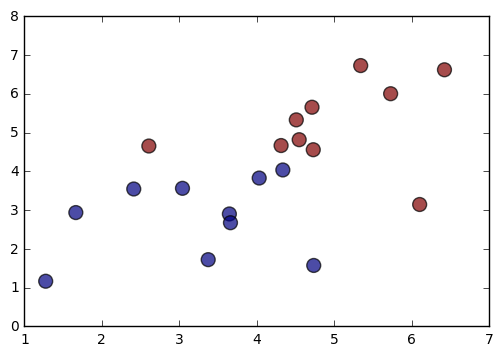

In [36]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=100, alpha=0.7) # pervyje i vtoroy stolbcy. c -- raspredelenie cvetov po tipam klassov. s -- radius
# priznaki -- koordinaty po X i Y. cvet -- tip klass

In [43]:
from sklearn.cross_validation import train_test_split
#model_selectio

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [38]:
! pip install sklearn --upgrade

  Running setup.py bdist_wheel for sklearn: started
  Running setup.py bdist_wheel for sklearn: finished with status 'done'
  Stored in directory: C:\Users\student\AppData\Local\pip\Cache\wheels\d7\db\a3\1b8041ab0be63b5c96c503df8e757cf205c2848cf9ef55f85e
Successfully built sklearn
  Found existing installation: scikit-learn 0.17.1
    Uninstalling scikit-learn-0.17.1:
      Successfully uninstalled scikit-learn-0.17.1


    DEPRECATION: Uninstalling a distutils installed project (scikit-learn) has been deprecated and will be removed in a future version. This is due to the fact that uninstalling a distutils project will only partially uninstall the project.
You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) #train - obuchayushee, test -- kontrolnaya

In [46]:
# razbirenie vyborki na 30% kontrolnoy i 70% obuchayushey

x_train

array([[ 3.03943503,  3.56464548],
       [ 4.50794438,  5.33109758],
       [ 4.0293388 ,  3.82953282],
       [ 4.73304298,  1.5739214 ],
       [ 3.64450343,  2.9030484 ],
       [ 4.54520561,  4.81918643],
       [ 4.72688889,  4.5606023 ],
       [ 1.66315506,  2.93884916],
       [ 4.71065075,  5.65701442],
       [ 1.27435409,  1.1668634 ],
       [ 5.72518896,  6.0059123 ],
       [ 4.33420179,  4.03821478],
       [ 3.3711809 ,  1.72361806],
       [ 5.3389254 ,  6.73211055]])

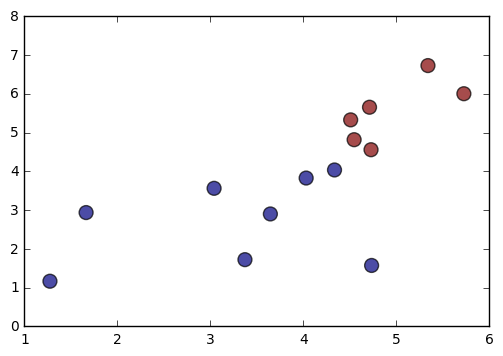

In [48]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=100, alpha=0.7) #objecty obuch vyborki

In [50]:
# algoritm kNN
from sklearn.neighbors import KNeighborsClassifier


In [51]:
knn = KNeighborsClassifier() # object-klass 

In [52]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [56]:
y_pred = knn.predict(x_test)
print(y_pred)

[-1. -1. -1.  1.  1. -1.]


In [57]:
y_test

array([ 1., -1., -1.,  1.,  1.,  1.])

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) #ocenka tochnosti

0.66666666666666663

In [61]:
np.mean(y_pred == y_test) # tozhe ocenka tochnosti

0.66666666666666663

In [ ]:
# kNN 
# object -- vektor. element objecta -- priznak. objecty -- tochki v n-mernom prostranstve.
# pust objecty dvux tipov